In [150]:
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np
import csv
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

In [151]:
# Cargar datos
# https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv
data = pd.read_csv('sleep_healt_pre.csv')
data
# 1) genero
# 2) duracion del sueño horas al dia
# 3) calidad del sueño 1-10
# 4) actividad fisica en minutos
# 5) nivel de estres 1-10
# 6) presion arterial
# 7) pasos diarios
# 8) edad como nuestra y

,1,6.1,6,42,6.2,77,4200,27
0,1,6.2,6,60,8,75,10000,28
1,1,6.2,6,60,8,75,10000,28
2,1,5.9,4,30,8,85,3000,28
3,1,5.9,4,30,8,85,3000,28
4,1,5.9,4,30,8,85,3000,28
...,...,...,...,...,...,...,...,...
368,2,8.1,9,75,3,68,7000,59
369,2,8.0,9,75,3,68,7000,59
370,2,8.1,9,75,3,68,7000,59
371,2,8.1,9,75,3,68,7000,59


In [152]:
data = np.loadtxt('sleep_healt_pre.csv', delimiter=',')
X_datos, y_datos = data[:, 0:7], data[:, 7]
print(X_datos)
print(y_datos)

[[1.0e+00 6.1e+00 6.0e+00 ... 6.0e+00 7.7e+01 4.2e+03]
 [1.0e+00 6.2e+00 6.0e+00 ... 8.0e+00 7.5e+01 1.0e+04]
 [1.0e+00 6.2e+00 6.0e+00 ... 8.0e+00 7.5e+01 1.0e+04]
 ...
 [2.0e+00 8.1e+00 9.0e+00 ... 3.0e+00 6.8e+01 7.0e+03]
 [2.0e+00 8.1e+00 9.0e+00 ... 3.0e+00 6.8e+01 7.0e+03]
 [2.0e+00 8.1e+00 9.0e+00 ... 3.0e+00 6.8e+01 7.0e+03]]
[27. 28. 28. 28. 28. 28. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 31. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 34. 34. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 37. 37.
 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37.
 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38. 38.
 38. 38. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39. 40.
 40. 40

In [153]:
# normalizacion de caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [154]:
X_norm, media_norm, sigma = featureNormalize(X_datos)

In [155]:
#X = X_norm
X = X_datos
y = y_datos
print(X[5])

[1.0e+00 5.9e+00 4.0e+00 3.0e+01 8.0e+00 8.5e+01 3.0e+03]


In [156]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m = y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.9893614  -1.29888693 ...  0.34702051  1.6547187
  -1.61958404]
 [ 1.         -0.9893614  -1.17303623 ...  1.47559156  1.17047394
   1.97007745]
 [ 1.         -0.9893614  -1.17303623 ...  1.47559156  1.17047394
   1.97007745]
 ...
 [ 1.          1.010753    1.21812712 ... -1.34583606 -0.52438269
   0.11335599]
 [ 1.          1.010753    1.21812712 ... -1.34583606 -0.52438269
   0.11335599]
 [ 1.          1.010753    1.21812712 ... -1.34583606 -0.52438269
   0.11335599]]


In [157]:
# funcion del costo
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))
    
    return J

In [158]:
# funcion descenso por gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [41.90096529  4.52129944  0.47975836  2.44989287  1.14399567  0.16912777
  0.59896376 -0.37612405]
El costo mas bajo es: 19.690160938087693


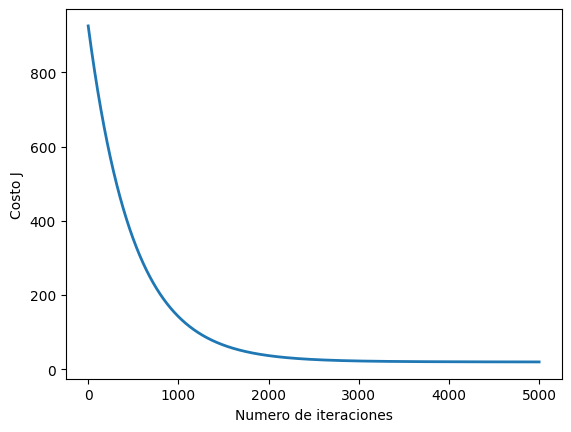

In [159]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('El costo mas bajo es: {:s}'.format(str(J_history[-1])))

In [160]:
# Estimar la edad de una persona con las siguientes caracteristicas
X_prueba = X[0:1, :].copy()
print('Caracteristicas: ', X_prueba)
# X_array[1:6] = (X_array[1:6] - mu) / sigma
age = np.dot(X_prueba, theta)   # Se debe cambiar esto

print('La edad de la persona (usando el descenso por el gradiente) es: {:0.1f}'.format(int(age)))
print('Edad esperado: ', y[0])

Caracteristicas:  [[ 1.         -0.9893614  -1.29888693 -1.09828011 -0.82541823  0.34702051
   1.6547187  -1.61958404]]
La edad de la persona (usando el descenso por el gradiente) es: 34.0
Edad esperado:  27.0
